### **1. Các dạng bài toán của AI**

#### **Supervised learning** (Học có giám sát): 
Khi data cung cấp mẫu dữ liệu và kết quả của mẫu dữ liệu đó
![Alt text](image-2.png)

Khi ta có **Hour studies** là mẫu dữ liệu và **Grade** là kết quả của mẫu dữ liệu đó. 

-> Yêu cầu là xây dựng một mô hình mà có thể dự đoán **Grade** khi ta input **Hour studies** vào.

Có 2 dạng toán nhỏ chính của Supervised Learning: 
1. Regression (Hồi quy): là dự đoán một giá trị về số (ví dụ như dự đoán điểm số, dự đoán giá nhà)
2. Classification (Phân loại): là dự đoán một giá trị là các nhóm (ví dụ như dự đoán giới tính, dự đoán chó hay mèo)

#### **Unsupervised learning (Học không giám sát)**
Khi data chỉ cung cấp dữ liệu nhưng không cung cấp kết quả của dữ liệu đó, ví dụ cùng một dataset "Breast Cancer" 
![Alt text](image-3.png)

- Đây là data có kết quả là bị ung thư hay không?, có thể dùng cho bài toán supervised learning

- Nhưng nếu chỉ cung cấp data như bên dưới thì ta chỉ có thể dùng bài toán unsupervised learning
![Alt text](image-4.png)

**Ví dụ như bài gom nhóm**
![Alt text](image-6.png)





#### **Kết luận**

![Alt text](image-5.png)

- Supervised learning là bài toán để tìm ra kết quả dự đoán cho mẫu dữ liệu 
- Unsupervised learning là bài toán tìm ra những mối liên hệ giữa các mẫu dữ liệu với nhau

### **2. Supervised Learning - House Pricing Prediction** 


Giới thiệu bài toán: 
- Dữ liệu ta gồm hai cột: area và price

![Alt text](image-7.png)

- Yêu cầu đề bài là dựa vào diện tích nhà, ta có thể dự đoán giá nhà -> Vậy thì dựa vào data này, ta có thể giải bằng dạng supervised learning với **area** là mẫu dữ liệu, **price** là kết quả của mẫu dữ liệu 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import random
data = np.genfromtxt('HousePricing.csv',dtype=float,delimiter=',')


In [55]:
data

array([[6.71, 9.12],
       [1.2 , 2.43],
       [1.86, 2.91],
       [2.09, 3.41],
       [3.05, 4.71],
       [4.69, 5.94],
       [3.57, 5.4 ],
       [5.55, 7.04],
       [2.39, 3.38],
       [3.94, 5.29]])

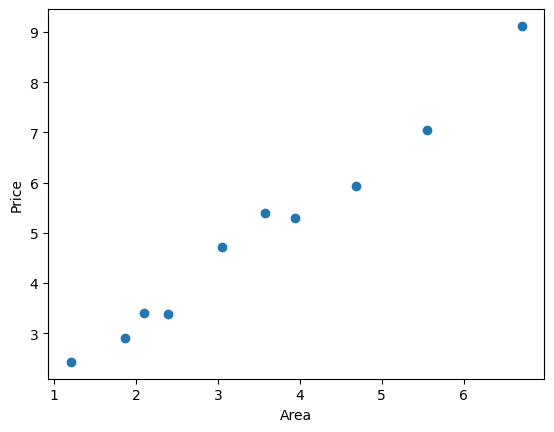

In [56]:
X = data[:,0]
Y = data[:,1]
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(X,Y)


### **Mục tiêu**
Trên các điểm xanh là những điểm trong data, và ví dụ trong data, có thêm những điểm chưa dc học, nhưng có cùng phân phối với data đã học

![Alt text](image.png)

Qua đó, ta nhận thức được rằng, cần kiếm đường thẳng dựa trên những data xanh dương đã học, và có thể đoán được data màu đỏ.

![Alt text](image-1.png)

### **Bài toán Linear Regression**
Tìm đường thẳng qua các dữ liệu 

Ta có, phương trình đường thẳng với bài giá nhà như sau: 
![Alt text](image-8.png)

Nhiệm vụ là phải tìm hai thông số **w** và **b** trong hình trên, để có thể vẽ ra đường thẳng

### **3. Cách giải bài toán này bằng AI như thế nào?**

1. Sẽ randomly hai thông số **w** và **b** đầu tiên
2. Sau đó tính ra kết quả dự đoán của từng mẫu dữ liệu, ví dụ ta chọn ngẫu nhiên **w=0.1, b=2**: 
![Alt text](image-9.png)


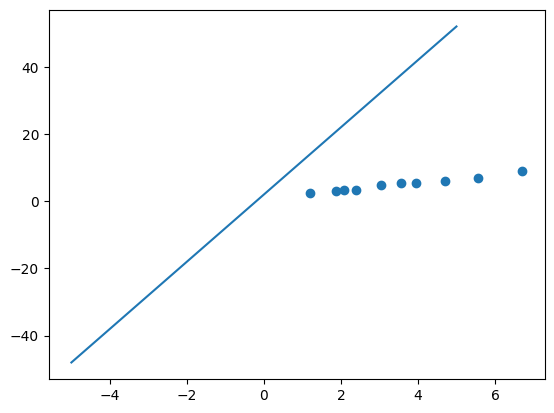

In [57]:
# Khởi tạo w và b:
w = 10
b = 2
# Vẽ đường thẳng lên với w và b khởi tạo
def plotData(data,w,b):
    X = data[:,0]
    Y = data[:,1]
    plt.scatter(X,Y)
    x = np.linspace(-5, 5, 100)
    y=w*x+b
    plt.plot(x,y)
    plt.show()

plotData(data,w,b)

In [58]:
# Hàm tính prediction 
def computePredictedValue(area,w,b):
    return w*area + b
print(computePredictedValue(area=6.71, w=w, b=b))

69.1


3. Tính hàm loss (error): là hàm sai số khi kết quả dự đoán với kết quả đúng
![Alt text](image-10.png)

Hỏi: Tại sao ta lại bậc 2 lên làm gì, thay vì chỉ trừ. 

Trả lời: Vì hàm bậc 2, ta có thể kiếm được giá trị tối ưu của độ sai số thấp nhất bằng cách dùng đạo hàm của phương trình trên và = 0

Tìm giá trị cực hạn của hàm số y(x) bằng cách cho y(x)' = 0


Mô tả: Ta có, x = predicted_value - real_price. Error = x^2
![Alt text](image-11.png)


In [59]:
def error_function(area,w,b,correct_result):
    return pow(( computePredictedValue(area,w,b) - correct_result ),2)
print(error_function(area=6.71, w=w, b=b, correct_result=9.12))
print("Error=", error_function(area=6.71, w=w, b=b, correct_result=9.12), 
      "X=",(computePredictedValue(area=6.71, w=w, b=b) - 9.12))

3597.6004
Error= 3597.6004 X= 59.98


![Alt text](image-12.png)

Giá trị của Error và X trên trục tọa độ

4. Cập nhật lại tham số **w** và **b** (Gradient Descent)

Nhưng vấn đề là máy tính không thể nào tự giải bài toán y'=0, cho nên ý tưởng là:
- Ta sẽ tính đạo hàm của các biến cần update trên hàm số, nếu giá trị đạo hàm lớn, chứng tỏ biến đó cần cập nhật nhiều, không thì cập nhật ít.

**Gradient Descent**:
Gradient descent (suy giảm độ dốc) là thuật toán giúp tìm ra điểm cực tiểu trong một hàm số y, bằng cách tính đạo hàm của giá trị x trên hàm số y, và với giá trị đạo hàm đó sẽ nhân với một learning rate để điểm dần dịch chuyển lại cực tiểu

![Alt text](image-14.png)


Vậy thì thử bằng cách nào? 

1. Tính sai số của giá trị dự đoán hiện tại
2. Tính giá trị đạo hàm của hàm số sai số đó trên hai tham số (w,b) 
3. Sử dụng learning_rate để cập nhật từ từ w,b:
- w-=learning_rate* dao_ham_w_tren_error
- b-=learning_rate* dao_ham_b_tren_error

Vậy thì làm thế nào để tính đạo hàm của hàm số sai số trên w,b?

Theo Chainrule: 
![Alt text](image-13.png)

Trong bài này: 
- y: error
- g: predicted_price

![Alt text](image-15.png)


y=f(x)=x^2 +2
y'(3) = 2x =2*3=6



In [81]:
learning_rate = 0.01
def computeDerivative(area,w,b,correct_result,attr) :
    if attr =="dao_ham_b": # tìm đạo hàm của w:
        return 2*computePredictedValue(area,w,b) - correct_result 
    if attr =="dao_ham_w" : # find ka:
        return 2*(computePredictedValue(area,w,b) - correct_result) * area

dao_ham_b = computeDerivative(area=6.41, w=w, b=b, correct_result=9.12, attr="dao_ham_b")
dao_ham_w = computeDerivative(area=6.41, w=w, b=b, correct_result=9.12, attr="dao_ham_w")

b -= dao_ham_b * learning_rate
w -= dao_ham_w * learning_rate

print(w,b)


1.4582560505235687 -0.3357653587326723


In [82]:
error_function(area=6.41,w=w,b=b,correct_result=9.12)

0.011738438560865495

Ta so sánh error function sau khi cập nhật w, b thì thấy rằng số đã giảm xuống từ: 
41.59 -> 1.24. 

Chứng tỏ w, b dần đúng và đường thẳng ngày càng đi qua được các điểm dữ liệu

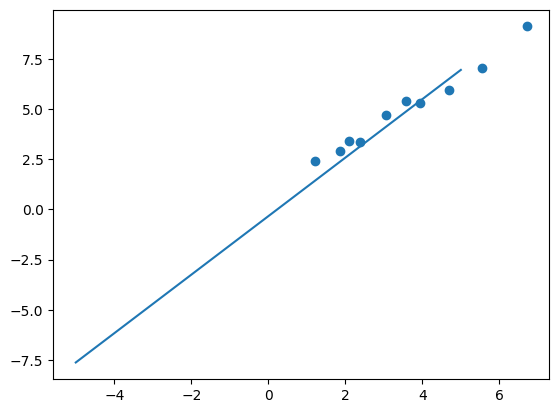

In [83]:
plotData(data,w,b)